In [1]:
from src.pispec import PiSpec
from src.trace_utils import TraceParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import time
from itertools import product
import re
import datetime

# initialize the interface0 v
pispec = PiSpec()
print(pispec.tracecontroller.device)
# TODO: this should be in config files
img_export_path = "img_export"

# alternate the datapoints between two detectors? 
# Thats a tracecontroller things

# the tracecontroller is broken

# pispec.tracecontroller._debug()



waiting for serial... 0.000501446008682251
/dev/ttyACM7


In [2]:
def plot_df(df, nm, col):
    """ helper function to create a plot and save it to disk """
    x = df.loc[df["nm"] == nm]['time_ms']
    y = df.loc[df["nm"] == nm][col]
    plt.scatter(x=x, y=y)
    plt.title(f"{nm}nm {col} vs time_ms")
    plt.xlabel("time (ms)")
    plt.ylabel(f"{col}")

    plt.savefig(f'{img_export_path}/{datetime.datetime.now().strftime("%y%m%d_%H%M")}_{nm}nm_{col}.png')
    plt.show()

In [3]:
for i in range(0, 100):
    pispec.run_experiment(exp_name="node", wavelengths=['830'], act_phase_vals=[0, 0, 0], btwn_trace_delay=1)
    print(i)

running experiment with the following wavelengths: ['830']
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x0;y0;z1
0
running experiment with the following wavelengths: ['830']
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x0;y0;z1
1
running experiment with the following wavelengths: ['830']
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x0;y0;z1
2
running experiment with the following wavelengths: ['830']
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x0;y0;z1
3
running experiment with the following wavelengths: ['830']
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x0;y0;z1
4
running experiment with the following wavelengths: ['830']
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x0;y0;z1
5
running experiment with the following wavelengths: ['830']
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x0;y0;z1
6
running experiment with the following wavelengths: ['830']
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x0;y0;z1


KeyboardInterrupt: 

## Experiment Test

In [4]:
exp_name = "4layerKimwipe"
wavelengths = ["520","830", "940"]
act_phase_vals = [0, 200, 0]

values = ["zero_val", "val", "raw_diff", "V", "d_abs"]

pispec.run_experiment(exp_name=exp_name, wavelengths=wavelengths, act_phase_vals=act_phase_vals)


running experiment with the following wavelengths: ['520', '830', '940']
e45;i1000;j0;n1000;p85;r0;s400;t600;v1;w0;x200;y0;z1
e45;i1000;j0;n1000;p85;r0;s400;t600;v6;w0;x200;y0;z1
e45;i1000;j0;n1000;p85;r0;s400;t600;v7;w0;x200;y0;z1


## peek at dataframe

In [5]:

df = pispec.get_df()
print(df.head())

  rep trace_num   trace_begun     trace_end  \
0   0         0  1.665773e+09  1.665773e+09   
1   0         0  1.665773e+09  1.665773e+09   
2   0         0  1.665773e+09  1.665773e+09   
3   0         0  1.665773e+09  1.665773e+09   
4   0         0  1.665773e+09  1.665773e+09   

                                        param_string note       created  \
0  e45;i1000;j0;n1000;p85;r0;s400;t600;v1;w0;x200...       1.665773e+09   
1  e45;i1000;j0;n1000;p85;r0;s400;t600;v1;w0;x200...       1.665773e+09   
2  e45;i1000;j0;n1000;p85;r0;s400;t600;v1;w0;x200...       1.665773e+09   
3  e45;i1000;j0;n1000;p85;r0;s400;t600;v1;w0;x200...       1.665773e+09   
4  e45;i1000;j0;n1000;p85;r0;s400;t600;v1;w0;x200...       1.665773e+09   

  pt_num  time_us  paq_0  ...  aq_3  aq_4   aq_5   val   zero_val   raw_diff  \
0      0      0.0  134.0  ...   0.0   7.0   41.0  47.8  75.333333 -27.533333   
1      1   1001.0  137.0  ...   0.0  13.0   86.0  43.6  69.666667 -26.066667   
2      2   2002.0  123.0  

## Plot the data

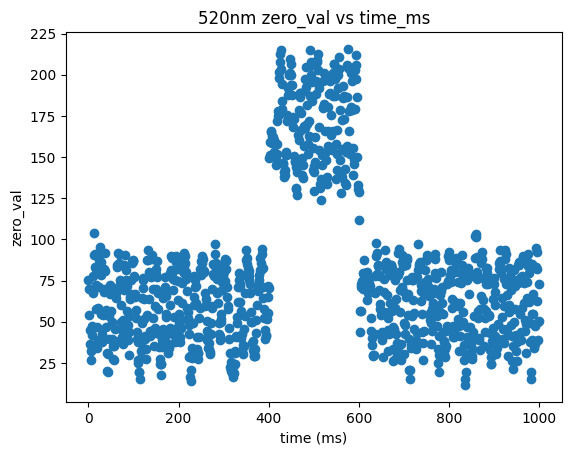

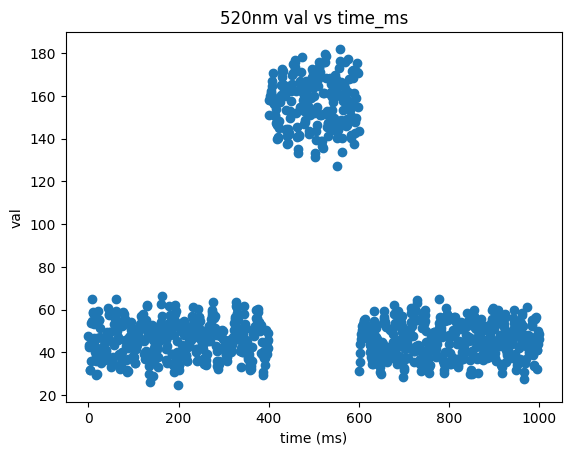

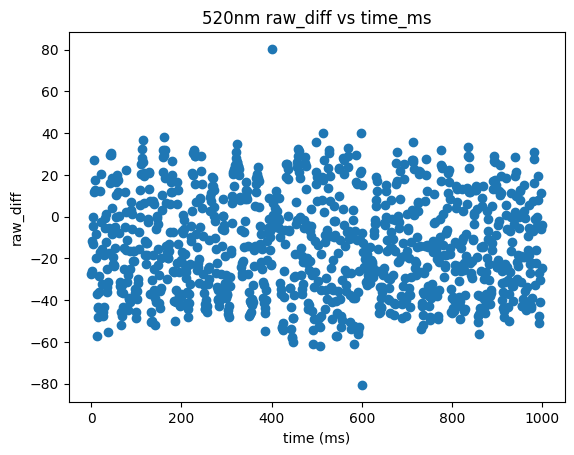

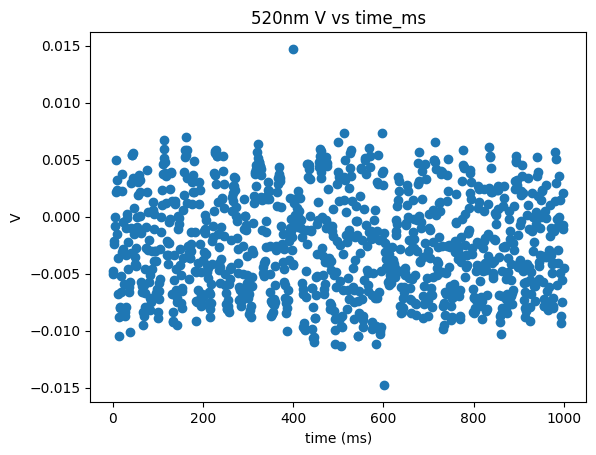

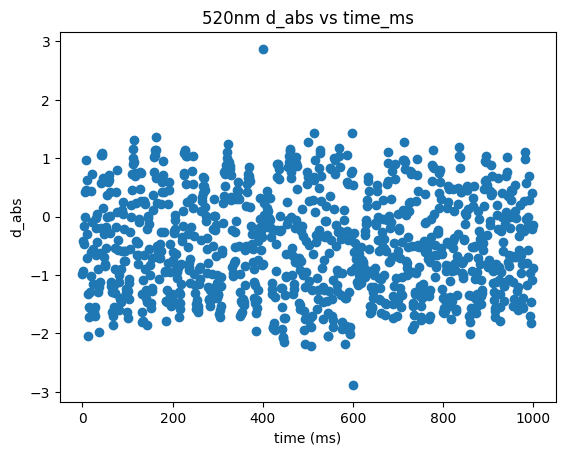

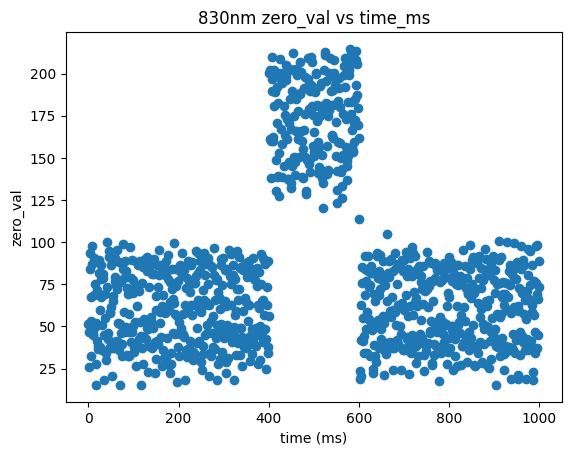

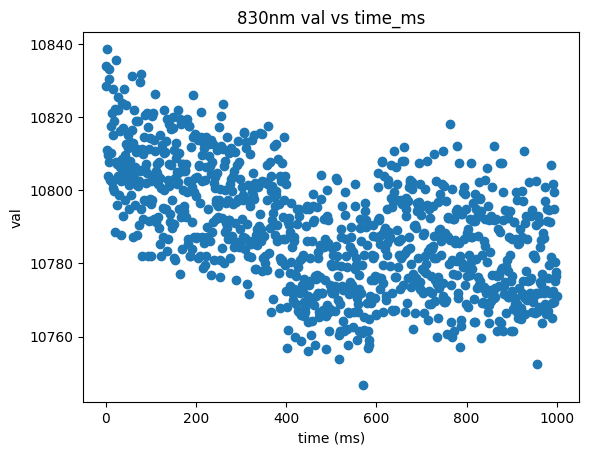

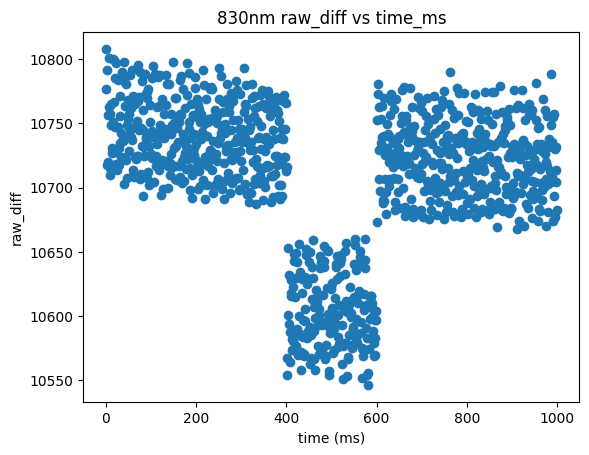

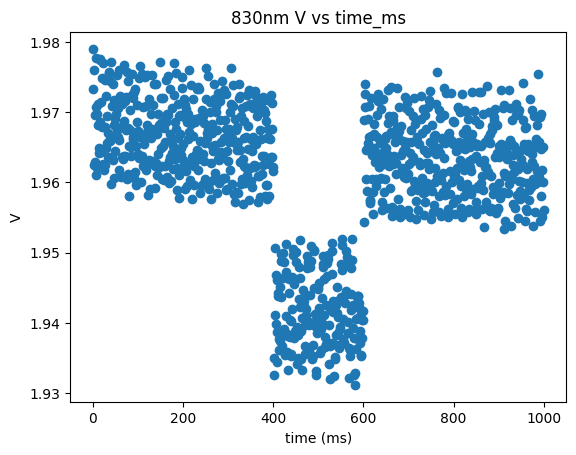

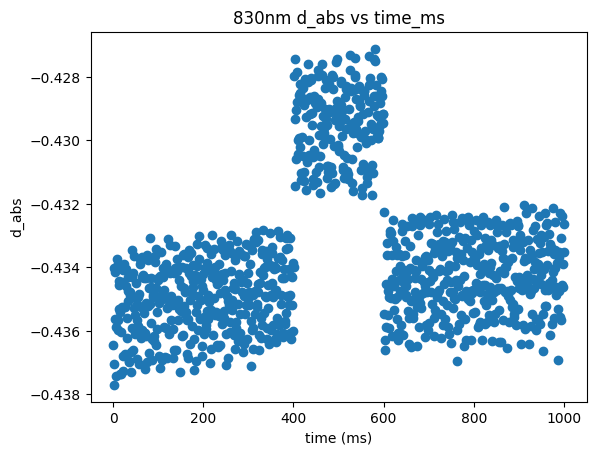

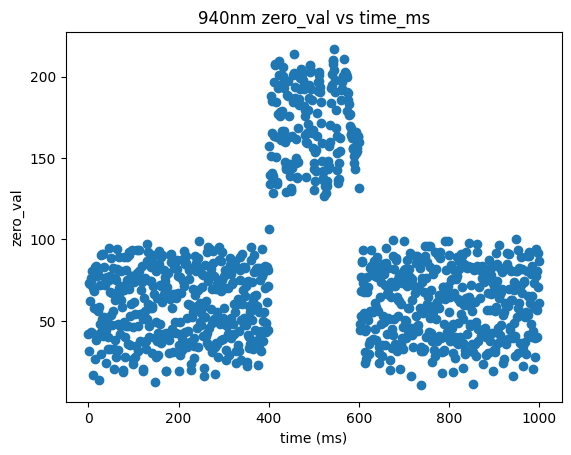

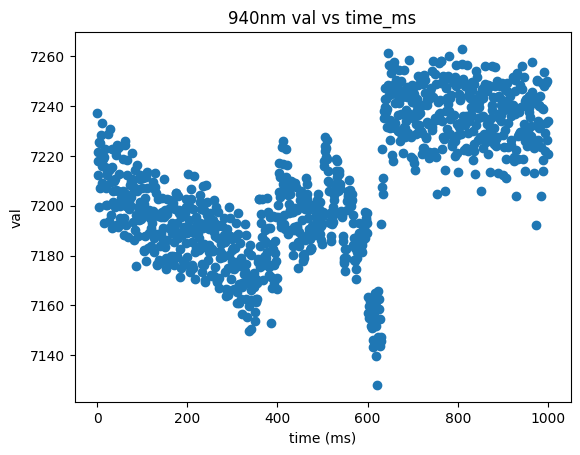

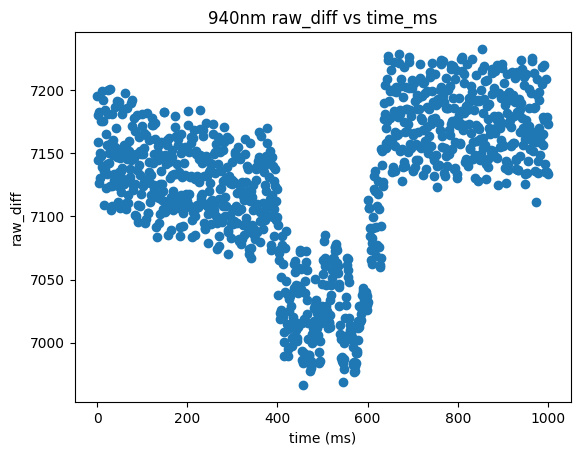

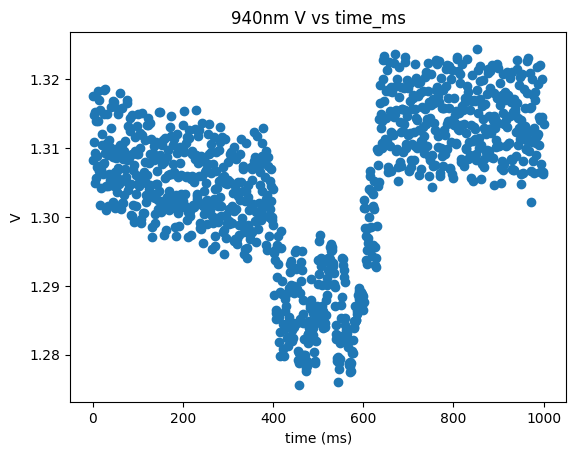

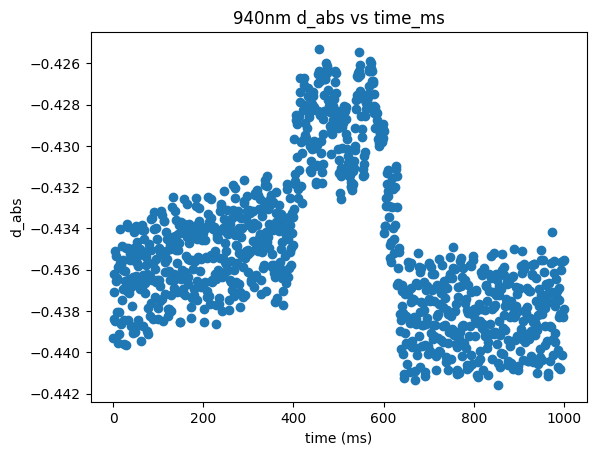

In [6]:
for c in product(wavelengths,values):
# for c in product(["520", "830", "940"], ["V", "val", "raw_diff", "d_abs"]):
    nm, col = c
    plot_df(df=df, nm=nm, col=col)


In [ ]:
for nm in ["520", "830", "940"]:
    aq_df = df.loc[df["nm"] == nm][['time_ms', 'paq_0', 'paq_1', 'paq_2','aq_0', 'aq_1', 'aq_2', 'aq_3', 'aq_4']]
    aq_df.set_index("time_ms", inplace=True)
    aq_df.plot(kind="line", ylim=(-100, 65000), title=f"raw {nm} aq values")
    plt.savefig(f"{img_export_path}/raw_{nm}_aq_val.png")

In [ ]:
def plot_dabs(df, nm):
    x = df.loc[df["nm"] == nm]['time_ms']
    y = df.loc[df["nm"] == nm]['d_abs']
    plt.scatter(x=x, y=y)
    plt.show()

plot_dabs(df=df, nm="940")


In [ ]:


print(np.min(df["pt_num"]), np.max(df["pt_num"]))
df = dfs[0]
df1 = dfs[1]
df["nm"] = 800
df1["nm"] = 900




df["dA"] = 






print(df.tail())

In [ ]:
# plot it
# plt.ylim(0, 12)
df.groupby("nm")["dAbs"].plot(legend=True)
df.to_csv(f"export/df.csv")

print(df.shape)
print(df.tail())

from 100-190, relative signal
before saturation pulse
delat transmission, change relative to the pre sat pulse transmission

deltaT / T

T = pre saturation pulse

THEN 

dA = (- deltaT/T)/2.3


In [ ]:

# prepulse_mean = df.iloc]
# df["dAbs"] = df["V"] / 

In [ ]:
# import re

# resp = re.findall(pattern="v[0-9]", string=df.param_string[0])
# print(resp)

divide 

In [ ]:
# # row means of all the data points
# df["val"] = df[['aq_0', 'aq_1', 'aq_2', 'aq_3', 'aq_4']].mean(numeric_only = True, axis=1)

# df["V"] = df["val"] / 6535


In [ ]:
# plt.plot(df['time_us'], df['V'])
# plt.ylim(0, 10)
# plt.show()

In [ ]:
# (x='time_us', y='val')
# plt.show()

# plt.plot(df['time_us'], df['aq_0'])
# plt.show()

In [ ]:

# pispec.tracecontroller.modify_actinic(intensity=500)
# time.sleep(5)
